In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from csv_cleaner import clean_df
from pipeline import ML_pipeline

# Chargement des données
df = pd.read_csv('../res/train.csv')

# Nettoyage des données
df = clean_df(df)
df.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price,Price
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,1,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,0,17.74
5,Hyundai,Hyderabad,2012,75000,LPG,Manual,First,29.54,814.0,55.20,0,2.35


In [9]:
X = df.drop(columns= ['Price'])
y = df['Price']

In [10]:
gbr = ML_pipeline(GBR(random_state=0), X, y)
gbr.data_conversion()
gbr.full_pipeline

In [14]:
# Mettre à jour la grille de paramètres pour cibler directement GradientBoostingRegressor au sein du pipeline
param_grid = {
    'gradientboostingregressor__n_estimators': [100, 200, 300],
    'gradientboostingregressor__max_depth': [5, 7],
    'gradientboostingregressor__min_samples_split': [2, 4],
    'gradientboostingregressor__min_samples_leaf': [1, 3],
    'gradientboostingregressor__max_features': ['sqrt'],
    'gradientboostingregressor__subsample': [1.0]
}

gbr_cv = GridSearchCV(gbr.full_pipeline, param_grid = param_grid, cv=5, scoring="neg_mean_squared_error")


In [15]:
gbr.model_train_and_eval(gbr_cv, nb_of_splits=5)
meilleur_modele = gbr.best_params

In [16]:
gbr.print_model_stats()

Mean MSE Score : 3.1173615355601676
Mean RMSE Score : 1.7634610128705266
Mean R2 Score : 0.9394933943171259
Best GridSearch parameters : {'gradientboostingregressor__max_depth': 7, 'gradientboostingregressor__max_features': 'sqrt', 'gradientboostingregressor__min_samples_leaf': 3, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__n_estimators': 300, 'gradientboostingregressor__subsample': 1.0}


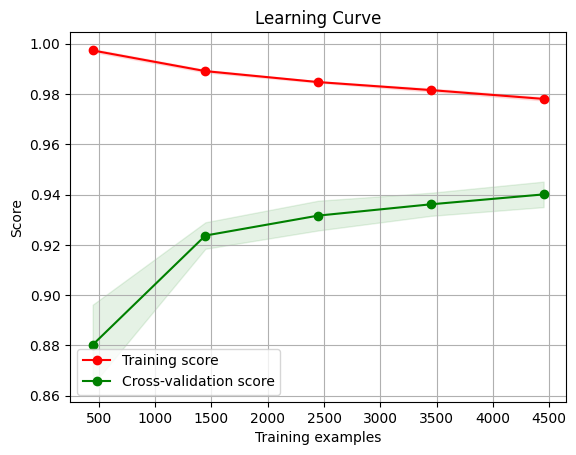

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(meilleur_modele, "Learning Curve", X, y)
plt.show()

In [6]:
# Enregistrement du modèle

# import pickle

# # Chemin où vous souhaitez enregistrer le modèle
# chemin_fichier = 'GBR.pkl'

# with open(chemin_fichier, 'wb') as fichier:
#     pickle.dump(meilleur_modele, fichier)

# print(f"Modèle enregistré avec succès dans {chemin_fichier}")


Modèle enregistré avec succès dans GBR.pkl


In [21]:
#Utilsation du modèle

import pickle

with open('GBR.pkl', 'rb') as fichier:
    GBR = pickle.load(fichier)

donnees_de_test = pd.read_csv('../res/train.csv')
donnees_de_test = clean_df(donnees_de_test)

predictions = GBR.predict(donnees_de_test)


print(predictions)
print(len(predictions))

[10.17600827  3.76245737  5.48251254 ...  5.32567963  2.45169726
  2.64493338]
5563
